### 分詞 斷詞

In [8]:
import urllib.request
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import pandas as pd

### TF-IDF

In [9]:
import jieba.analyse
url = "https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt"
text = urllib.request.urlopen(url).read().decode("utf-8")
result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

for i in result:
    print('word:', i[0], 'TF-IDF:', i[1])


Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/ry/phxc250s3lx_m2h646xkjb1h0000gn/T/jieba.cache
Loading model cost 0.682 seconds.
Prefix dict has been built successfully.


word: 什麼 TF-IDF: 0.19464509600157406
word: 八卦 TF-IDF: 0.19420501140555646
word: 台灣 TF-IDF: 0.12081408131496592
word: 怎麼 TF-IDF: 0.11186701189176337
word: 肥宅 TF-IDF: 0.07336596927026089
word: 現在 TF-IDF: 0.03800903805058438
word: 不會 TF-IDF: 0.036229733848907944
word: 還是 TF-IDF: 0.03568381096884812
word: 是不是 TF-IDF: 0.0355764318510935
word: 一個 TF-IDF: 0.03550183667549485
word: 中國 TF-IDF: 0.034474018907481
word: 這樣 TF-IDF: 0.0325902479818425
word: 怎樣 TF-IDF: 0.029860633581543415
word: 時候 TF-IDF: 0.02967528939386879
word: 一樣 TF-IDF: 0.028691280252032575
word: 真的 TF-IDF: 0.026822655692091746
word: 沒有 TF-IDF: 0.026099831518909124
word: ... TF-IDF: 0.02543259244328046
word: 應該 TF-IDF: 0.02359936993246231
word: 可以 TF-IDF: 0.022958278161416924
word: 喜歡 TF-IDF: 0.02285462328744244
word: 因為 TF-IDF: 0.022416537025666042
word: 一堆 TF-IDF: 0.021680457381807062
word: 問題 TF-IDF: 0.020815837223021518
word: 感覺 TF-IDF: 0.020714740393380813
word: 哪個 TF-IDF: 0.020643972612632316
word: 女生 TF-IDF: 0.0205553136

### fig#1 x軸: 字詞編號,  y軸: 權重

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

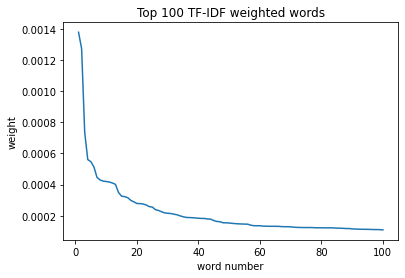

In [5]:
import urllib.request
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt"
response = urllib.request.urlopen(url)
text = response.read().decode()
docs = text.split('\n') # 一行算一個文章

vectorizer = TfidfVectorizer() # 算TF-IDF權重
X = vectorizer.fit_transform(docs)

weights = np.asarray(X.mean(axis=0)).ravel().tolist() # 所有字詞的TF-IDF權重平均值
df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'weight': weights})
df = df.sort_values(by='weight', ascending=False)


top100 = df[:100] # 取前100個

plt.plot(range(1, 101), top100['weight'], marker='', linestyle='-')
plt.title('Top 100 TF-IDF weighted words')
plt.xlabel('word number')
plt.ylabel('weight')
plt.show()

### fig#2 x軸: 字詞編號,  y軸: 出現頻率

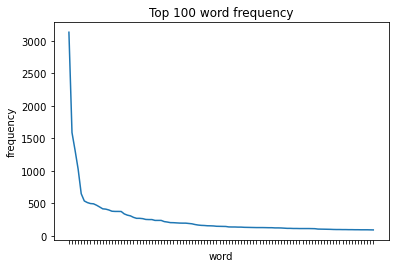

In [7]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt'
response = urllib.request.urlopen(url)
text = response.read().decode()

# 將語料轉換成一個詞彙列表
words = text.split()

# 使用 numpy 轉換成一維陣列，計算出現頻率
unique, counts = np.unique(words, return_counts=True)
freqs = np.asarray((unique, counts)).T
freqs = freqs[np.argsort(-freqs[:, 1].astype(int))]  # 將出現頻率轉換為整數

# 取出前 100 項並畫出統計圖形
top_freqs = freqs[:100]
x = range(1, len(top_freqs)+1)
y = top_freqs[:, 1].astype(int)  # 只取詞頻
labels = top_freqs[:, 0]  # 保留詞彙，用作 x 軸標籤

plt.plot(x, y, linestyle='-')
plt.xticks(x, [])
plt.title('Top 100 word frequency')
plt.xlabel('word')
plt.ylabel('frequency')
plt.show()

### fig#3 文字雲

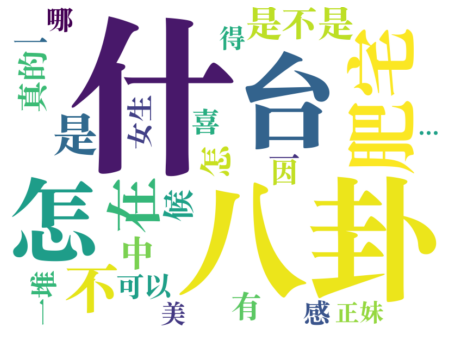

In [6]:
import jieba.analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt"
text = urllib.request.urlopen(url).read().decode("utf-8")
result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

# 取前 32 個詞彙
result = result[:32]

# 將詞彙及權重轉成 dictionary
words_dict = dict(result)

# 產生 WordCloud 物件
wc = WordCloud(font_path='/System/Library/Fonts/Supplemental/Songti.ttc', width=800, height=600, background_color='white')

# 將 dictionary 中的詞彙及權重傳給 WordCloud 物件
wc.generate_from_frequencies(words_dict)

# 繪製文字雲
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
